# Sklearn

## Генерация модельных данных

## sklearn.datasets

документация: http://scikit-learn.org/stable/datasets/

In [2]:
from sklearn import datasets

In [3]:
# magic function в ipython
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация выборок

**Способы генерации данных:** 
* make_classification - функция генерирования данных для задач классификации
* make_regression - для задач регрессии
* make_circles - генерирование набора данных, которые удобно отрисовывать на плоскости
* make_checkerboard
* etc

#### datasets.make_circles

In [4]:
circles = datasets.make_circles()

В качестве объекта tuple состоящий из двух элементов.
Первый элемент — это непосредственно набор данных, список описаний наших объектов.
И второй элемент — это метки классов.

In [5]:
print "features: {}".format(circles[0][:10])
print "target: {}".format(circles[1][:10])

features: [[ 0.96858316  0.24868989]
 [ 0.79369176 -0.10026659]
 [ 0.34062343  0.72386164]
 [ 0.30901699 -0.95105652]
 [-0.63742399 -0.77051324]
 [-0.79369176  0.10026659]
 [ 0.80901699  0.58778525]
 [-0.50993919  0.61641059]
 [-0.5831749  -0.54763768]
 [ 0.5831749   0.54763768]]
target: [0 1 1 0 0 1 0 1 1 1]


In [6]:
from matplotlib.colors import ListedColormap

функция **scatter** позволяет нам отрисовывать точки, зная их x и y координаты.
На входе нужно подать два списка: первый — список x координат,
второй — список y координат.

**Colormap**.
Мы создаем его вот здесь, мы говорим, что у нас есть всего 2 цвета,
в данном случае красный и желтый, так как классов у нас также два, и таким образом получается,
что объекты с меткой 0 будут иметь красный цвет, с меткой 1 — желтый

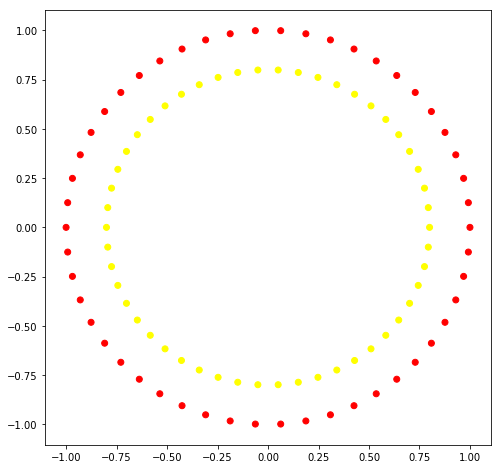

In [7]:
colors = ListedColormap(['red', 'yellow'])

pyplot.figure(figsize(8, 8))
pyplot.scatter(map(lambda x: x[0], circles[0]), map(lambda x: x[1], circles[0]), c = circles[1], cmap = colors)

обернем эти команды в одну функцию, потому что нам она в дальнейшем понадобится, чтобы запись была несколько короче

In [8]:
def plot_2d_dataset(data, colors):
    pyplot.figure(figsize(8, 8))
    pyplot.scatter(map(lambda x: x[0], data[0]), map(lambda x: x[1], data[0]), c = data[1], cmap = colors)

Чтобы получить окружность не с такими четкими краями,передадим внутрь нашей функции параметр noise,
означает некоторый шум, который мы добавим к нашим данным

In [9]:
noisy_circles = datasets.make_circles(noise = 0.15)

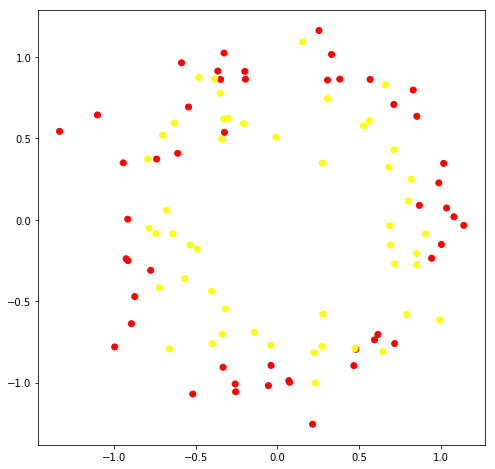

In [10]:
plot_2d_dataset(noisy_circles, colors)

#### datasets.make_classification

укажем количество объектов, которые мы хотим видеть в
нашем наборе, количество признаков, также мы можем задать,
сколько из этих признаков должны быть информативными, а сколько избыточными.

Для того чтобы визуализировать набор данных,
а мы обязательно захотим это сделать, нам удобнее работать с двумя признаками

In [11]:
simple_classification_problem = datasets.make_classification(n_features = 2, n_informative = 1, 
                                                            n_redundant = 1, n_clusters_per_class = 1,
                                                            random_state = 1 )

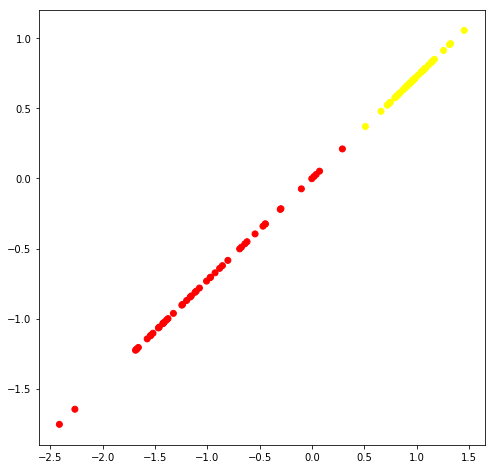

In [12]:
plot_2d_dataset(simple_classification_problem, colors)

Теперь давайте немножечко усложним.
Будем решать задачу классификации на 4 класса.
Для этого изменим значение параметра **n_classes (number of classes)** и скажем, что пусть в данном случае два признака будут информативными

In [15]:
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 4, 
                                                      n_redundant = 0, n_clusters_per_class = 1, random_state = 1)

# изменим объект colors, так нам необходимо 4 цвета, для отрисовки
colors = ListedColormap(['red', 'blue', 'green', 'yellow'])

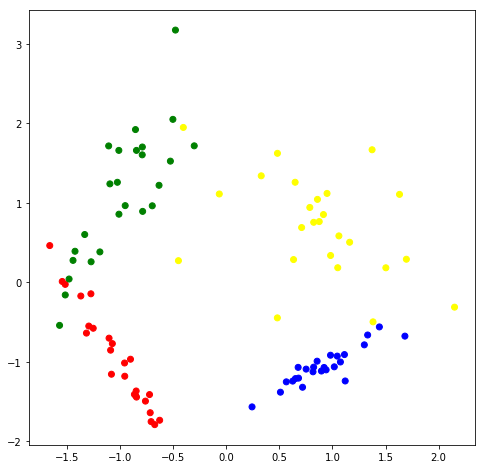

In [16]:
plot_2d_dataset(classification_problem, colors)

Таким образом, с помощью этой функции можно генерировать набор данных
практически любой сложности и гибко решать интересующие вас задачи.

### "Игрушечные" наборы данных

**Наборы данных:** 
* load_iris 
* load_boston
* load_diabetes
* load_digits
* load_linnerud
* etc

#### datasets.load_iris

In [17]:
# загрузим датасет 
iris = datasets.load_iris()

In [19]:
# набор ключей, нам доступны названия признаков, доступны сами данные, сама
# целевая переменная, также есть некоторое описание данных и известны имена классов
iris.keys()

['target', 'DESCR', 'target_names', 'feature_names', 'data', 'filename']

In [20]:
print iris.DESCR

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [21]:
# выведем имена признаков и имена классов
print "feature names: {}".format(iris.feature_names)
print "target names: {names}".format(names = iris.target_names)

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


In [22]:
# первые 10 обЪектов
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [23]:
# целевая переменная, классы представлены метками от 0 до 2 и объекты отсортированы по классам
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Визуализация выбокри

Визуализируем наши данные. Для этого нам будет удобно работать с данными, как с таблицей.
Вспомним немножечко библиотеку pandas и давайте построим новый DataFrame.

In [26]:
from pandas import DataFrame

Строить будем его на основе наших данных,
далее добавим в качестве названий колонок имена признаков,
потому что они нам также доступны, и добавим дополнительный столбец target.
Он нам нужен для того, чтобы анализировать данные, зная информацию о классах

In [27]:
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target

In [28]:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Для визуализации набора данных рассмотрим колонку target и заменим в ней метки классов на их имена.
Это можно сделать очень просто с помощью функции apply.
Передадим в нее lambda функцию,
которая берет метку класса и вместо нее подставляет название.

In [29]:
iris_frame.target = iris_frame.target.apply(lambda x : iris.target_names[x])

In [30]:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Гистограмма первого признака для класса setosa

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ae20b0d10>]],
      dtype=object)

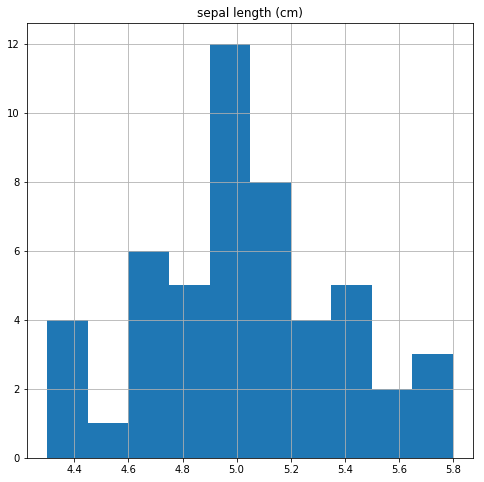

In [31]:
iris_frame[iris_frame.target == 'setosa'].hist('sepal length (cm)')

В общем-то,
нам интересно посмотреть на распределение всех признаков в рамках всех классов.
Но нам хочется понять, вообще говоря, отличаются они между собой или нет,
сможем ли мы по этим признакам каким-то образом разделить наши объекты

воспользуемся pyplot и в цикле по
признакам и по классам будем строить некоторые графики.
Для этого нам понадобится метод subplot,
который позволяет нам строить такую матрицу из графиков.
В этот метод мы можем передать количество строк и количество столбцов, которое
мы хотим, и также для каждого конкретного графика нужно будет сдать его номер.

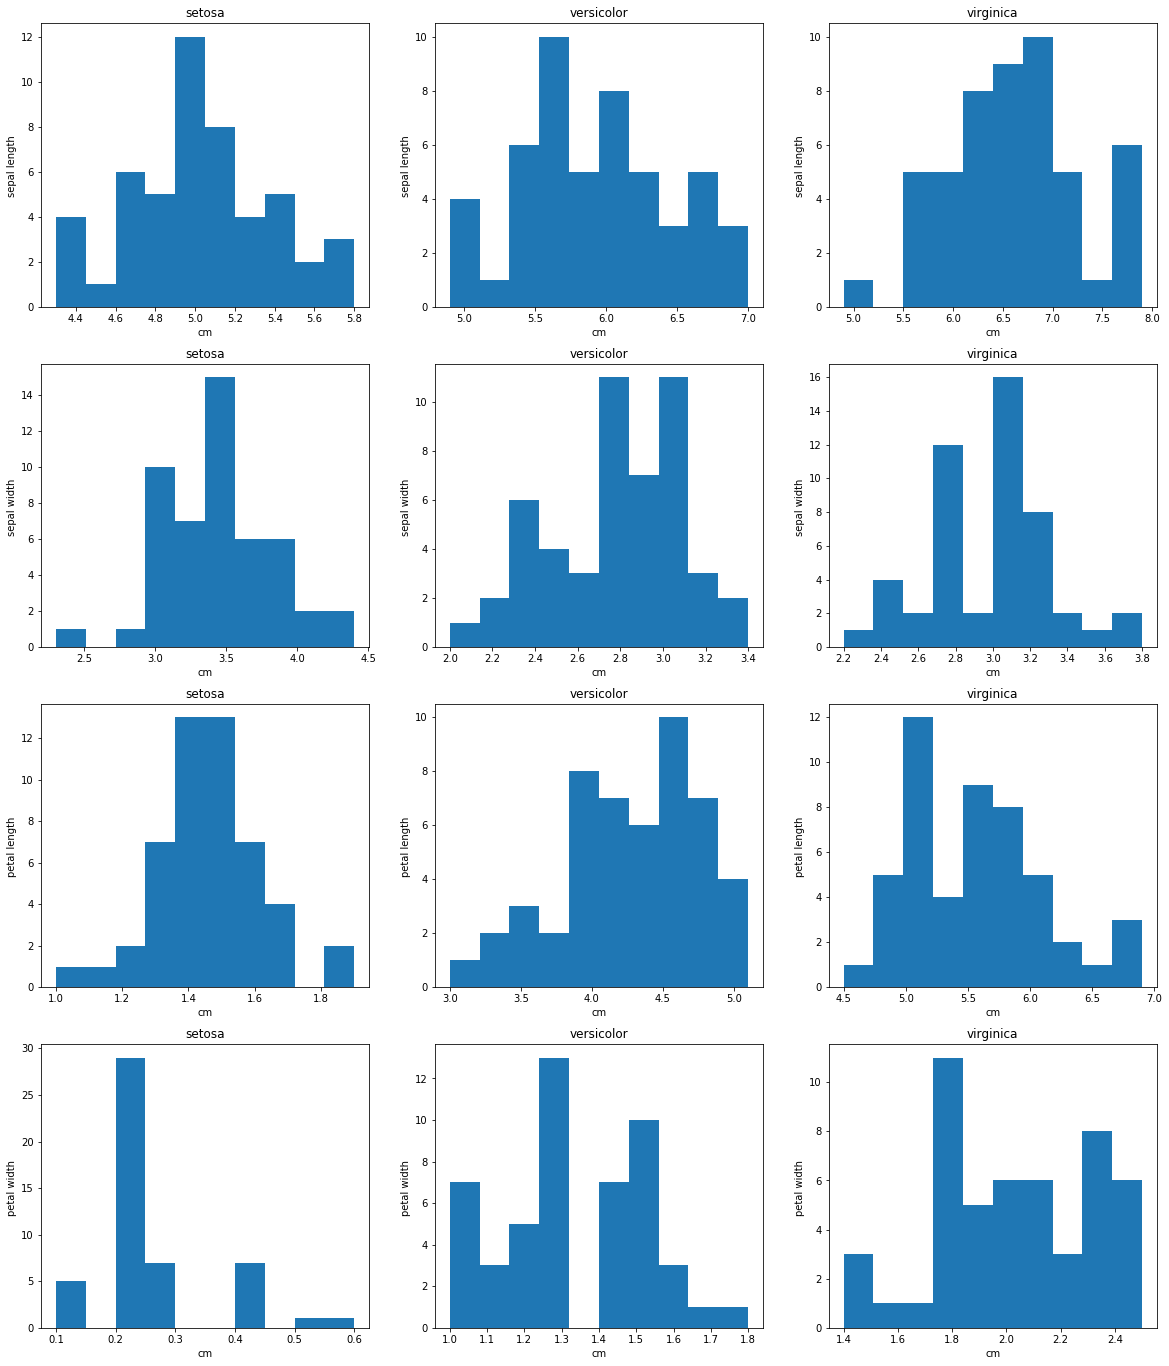

In [32]:
pyplot.figure(figsize(20, 24))

plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(iris_frame[iris_frame.target == target_name][feature_name])
        # помимо самого графика, мы будем задавать его название, будем задавать ось x и ось y, как они называются.
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

Видим, что по столбцам у нас идут графики, касающиеся разных классов,
и по строчкам мы видим признаки.

### Бонус: библиотека seaborn

In [33]:
import seaborn as sns

Отобразим наши объекты в координатах пар признаков и посмотрим,
хорошо ли они разделяются.
Это можно сделать с помощью метода pairplot.
Передаем этому методу наши dataframe и говорим,
в каком столбике находится наша целевая метка.

/home/yerkhat96/anaconda2/envs/gl-env/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


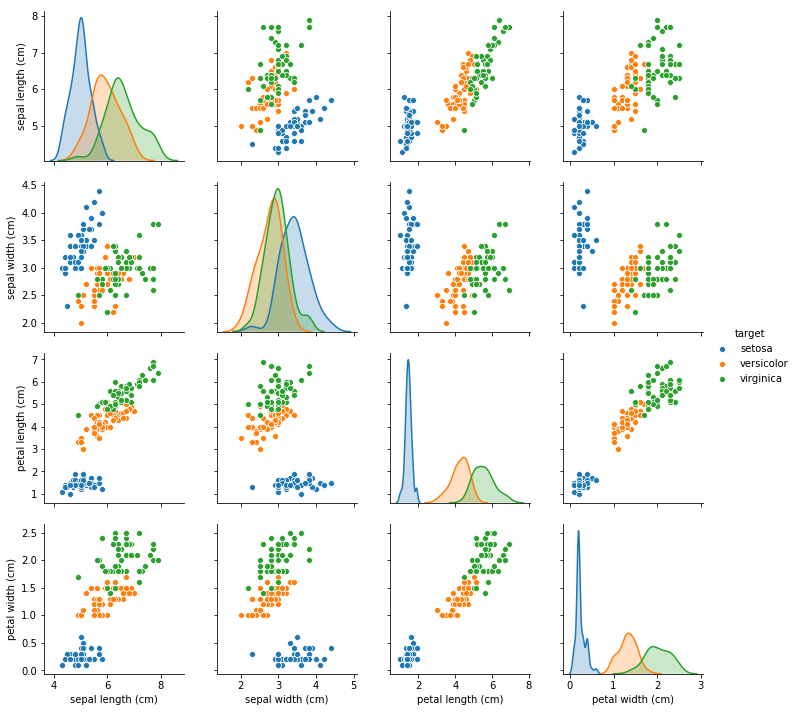

In [34]:
sns.pairplot(iris_frame, hue = 'target')

In [35]:
?sns.set()

С помощью метода **set** задать очень много параметров.
Например, мы можем указать, какой шрифт мы хотим использовать,
мы можем увеличить шрифт, можем задать цвета и так далее.

Вот давайте немножечко увеличим шрифт и хочется показать вам еще одну вещь.
Так как dataset "iris" довольно популярен, это стандартная вещь.
Библиотека seaborn содержит функцию, которая позволяет этот dataset
импортировать непосредственно, поэтому вам необязательно нужно иметь уже готовую
dataframe к тому моменту, когда вы хотите рисовать этот график.


In [ ]:
sns.set(font_scale = 1.3)
data = sns.load_dataset("iris")
sns.pairplot(data, hue = "species")

#### **Если Вас заинтересовала библиотека seaborn:**
* установка: https://stanford.edu/~mwaskom/software/seaborn/installing.html
* установка c помощью анаконды: https://anaconda.org/anaconda/seaborn
* руководство: https://stanford.edu/~mwaskom/software/seaborn/tutorial.html
* примеры: https://stanford.edu/~mwaskom/software/seaborn/examples/